<a href="https://colab.research.google.com/github/suafle/useful_codes/blob/master/spectrum_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.integrate import quad
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.interpolate import interp1d
from astropy.utils.data import download_file

In [0]:
#Blackbody plot
def BB(wave,Teff):
  #wave must be in A
  c = 2.99792e8 #m s^-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave*1e-10)**5)*(1./(np.exp(h*c/(wave*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  return flambda_BB_SI/1e10 #W m**-2 A**-1

In [0]:
#UBVRI passbands

#wavelength must be between 3000 and 4200 A (U)
#wavelength must be between 3600 and 5600 A (B)
#wavelength must be between 4700 and 7400 A (V)
#wavelength must be between 5500 and 9100 A (R)
#wavelength must be between 7000 and 9200 A (I)

def inter_U(wavelength): 
  U_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/U.txt'
  U = np.loadtxt(U_data)
  Uww = U[:,0] #A
  Ur = U[:,1]
  f = interp1d(Uww,Ur)
  return f(wavelength)
  
def inter_B(wavelength): 
  B_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/B.txt'
  B = np.loadtxt(B_data)
  Bww = B[:,0]
  Br = B[:,1]
  f = interp1d(Bww,Br)
  return f(wavelength)

def inter_V(wavelength): 
  V_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/V.txt'
  V = np.loadtxt(V_data)
  Vww = V[:,0]
  Vr = V[:,1]
  f = interp1d(Vww,Vr)
  return f(wavelength)

def inter_R(wavelength): 
  R_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/R.txt'
  R = np.loadtxt(R_data)
  Rww = R[:,0]
  Rr = R[:,1]
  f = interp1d(Rww,Rr)
  return f(wavelength)

def inter_I(wavelength): 
  I_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/I.txt'
  I = np.loadtxt(I_data)
  Iww = I[:,0]
  Ir = I[:,1]
  f = interp1d(Iww,Ir)
  return f(wavelength)

In [0]:
#2MASS passbands

def inter_j(wavelength): #wavelength must be in A in the range of 10620 and 14500 A
  mass_j = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_J.txt'
  tmass_j = np.loadtxt(mass_j)
  f = interp1d(tmass_j[:,0]*1e4,tmass_j[:,1])
  return f(wavelength)
  
def inter_h(wavelength): #wavelength must be in A in the range of 12890 and 19140 A
  mass_h = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_H.txt'
  tmass_h = np.loadtxt(mass_h)
  f = interp1d(tmass_h[:,0]*1e4,tmass_h[:,1])
  return f(wavelength)
  
def inter_ks(wavelength): #wavelength must be in A in the range of 19000 and 23990 A
  mass_ks = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_Ks.txt'
  tmass_ks = np.loadtxt(mass_ks)
  f = interp1d(tmass_ks[:,0]*1e4,tmass_ks[:,1])
  return f(wavelength)

In [0]:
#GAIA passbands

def inter_g(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_g = gaia[:,1]
  f = interp1d(gaia_w,gaia_g)
  return f(wavelength)
  
def inter_gbp(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_bp = gaia[:,3]
  f = interp1d(gaia_w,gaia_bp)
  return f(wavelength)
  
def inter_grp(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_rp = gaia[:,5]
  f = interp1d(gaia_w,gaia_rp)
  return f(wavelength)

In [0]:
#WISE passbands

#wavelength must be between 25300 and 65000 A (W1)
#wavelength must be between 25300 and 80000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)

def inter_w1(wavelength): 
  wise1_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W1.txt'
  w1 = np.loadtxt(wise1_data)
  w1ww = w1[:,0]*1e4
  w1r = w1[:,1]
  f = interp1d(w1ww,w1r)
  return f(wavelength)
  
def inter_w2(wavelength): 
  wise2_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W2.txt'
  w2 = np.loadtxt(wise2_data)
  w2ww = w2[:,0]*1e4
  w2r = w2[:,1]
  f = interp1d(w2ww,w2r)
  return f(wavelength)

def inter_w3(wavelength): 
  wise3_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W3.txt'
  w3 = np.loadtxt(wise3_data)
  w3ww = w3[:,0]*1e4
  w3r = w3[:,1]
  f = interp1d(w3ww,w3r)
  return f(wavelength)

def inter_w4(wavelength): 
  wise4_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W4.txt'
  w4 = np.loadtxt(wise4_data)
  w4ww = w4[:,0]*1e4
  w4r = w4[:,1]
  f = interp1d(w4ww,w4r)
  return f(wavelength)

In [0]:
def mag_ab(Teff,Lbol): 
  Mpc = 3.0856e22 #m
  c = 2.99792e8 #m s^-1
  cA = c*1e10 #A s**-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  pc = 3.0857e16 #m
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  delta_wave = 100 #Å
  wave_vector = np.arange(3000,3e7,delta_wave) #Check the graph above (also in A)
  d = 10 #pc, to account for absolute magnitudes
  
  #Generate black body spectrum in f_lambda units
  #-----------------------------------------
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave_vector*1e-10)**5)*(1./(np.exp(h*c/(wave_vector*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  flambda_BB_SI = flambda_BB_SI/1e7 # erg s**-1 cm**-2 A**-1
  R = np.sqrt(Lbol*Lsun/(4.*np.pi*sigma_SB*Teff**4)) # m Source radius (considering we know Lbol and Teff)
  flux = flambda_BB_SI*(R/(d*pc))**2 #Flux from the source at 10 pc
  
  #AB magnitude
  fgaia = interp1d(wave_vector,flux)
  
  #################
  #UBVRI magnitude#
  #################
  
  #wavelength must be between 3000 and 4200 A (U)
  #wavelength must be between 3600 and 5600 A (B)
  #wavelength must be between 4700 and 7400 A (V)
  #wavelength must be between 5500 and 9100 A (R)
  #wavelength must be between 7000 and 9200 A (I)
  ww = np.arange(3000,4200,0.1)
  f = np.trapz(fgaia(ww) * inter_U(ww) * ww, x=ww) / np.trapz(inter_U(ww) * cA / ww, x=ww)
  u =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(3600,5600,0.1)
  f = np.trapz(fgaia(ww) * inter_B(ww) * ww, x=ww) / np.trapz(inter_B(ww) * cA / ww, x=ww)
  b =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(4700,7400,0.1)
  f = np.trapz(fgaia(ww) * inter_V(ww) * ww, x=ww) / np.trapz(inter_V(ww) * cA / ww, x=ww)
  v =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(5500,9100,0.1)
  f = np.trapz(fgaia(ww) * inter_R(ww) * ww, x=ww) / np.trapz(inter_R(ww) * cA / ww, x=ww)
  r =  -2.5 * np.log10(f) - 48.60
  
  #################
  #2MASS magnitude#
  #################
  
  ww = np.arange(10620,14500,1)
  f = np.trapz(fgaia(ww) * inter_j(ww) * ww, x=ww) / np.trapz(inter_j(ww) * cA / ww, x=ww)
  j =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(12890,19140,1)
  f = np.trapz(fgaia(ww) * inter_h(ww) * ww, x=ww) / np.trapz(inter_h(ww) * cA / ww, x=ww)
  h =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(19000,23990,1)
  f = np.trapz(fgaia(ww) * inter_ks(ww) * ww, x=ww) / np.trapz(inter_ks(ww) * cA / ww, x=ww)
  ks =  -2.5 * np.log10(f) - 48.60
  
  
  ################
  #GAIA magnitude#
  ################
  
  ww = np.arange(3000,11000,1)
  f = np.trapz(fgaia(ww) * inter_g(ww) * ww, x=ww) / np.trapz(inter_g(ww) * cA / ww, x=ww)
  g =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_gbp(ww) * ww, x=ww) / np.trapz(inter_gbp(ww) * cA / ww, x=ww)
  gbp =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_grp(ww) * ww, x=ww) / np.trapz(inter_grp(ww) * cA / ww, x=ww)
  grp =  -2.5 * np.log10(f) - 48.60
  ww = np.arange(7000,9200,0.1)
  f = np.trapz(fgaia(ww) * inter_I(ww) * ww, x=ww) / np.trapz(inter_I(ww) * cA / ww, x=ww)
  i =  -2.5 * np.log10(f) - 48.60
  
  ################
  #WISE magnitude#
  ################
  
  #wavelength must be between 25300 and 65000 A (W1)
  #wavelength must be between 25300 and 80000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  
  ww = np.arange(25300,65000,1)
  f = np.trapz(fgaia(ww) * inter_w1(ww) * ww, x=ww) / np.trapz(inter_w1(ww) * cA / ww, x=ww)
  w1 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,80000,1)
  f = np.trapz(fgaia(ww) * inter_w2(ww) * ww, x=ww) / np.trapz(inter_w2(ww) * cA / ww, x=ww)
  w2 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,285000,1)
  f = np.trapz(fgaia(ww) * inter_w3(ww) * ww, x=ww) / np.trapz(inter_w3(ww) * cA / ww, x=ww)
  w3 =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_w4(ww) * ww, x=ww) / np.trapz(inter_w4(ww) * cA / ww, x=ww)
  w4 =  -2.5 * np.log10(f) - 48.60
  
  #U,B,V,R,I,J,H,Ks,G,Gbp,Grp,W1,W2,W3,W4 #15 bands
  #Effective wavelengths in A
  #U = 3571
  #B = 4344
  #V = 5456
  #R = 6442
  #I = 7994
  #J = 12355
  #H = 16458
  #Ks =	21603
  #G = 6730
  #GBP = 5320
  #GRP = 7970
  #W1 = 3.4e4
  #W2 = 4.6e4
  #W3 = 12e4
  #W4 = 22e4
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4


def mag_vega(Teff,Lbol):
  
  #Normal bands
  #mab - mvega = C -> mvega = mab - C  where C is the offset
  u_ab,b_ab,v_ab,r_ab,i_ab,j_ab,h_ab,ks_ab,g_ab,gbp_ab,grp_ab,w1_ab,w2_ab,w3_ab,w4_ab = mag_ab(Teff,Lbol)
  
  u = u_ab - 0.79
  b = b_ab + 0.09
  v = v_ab - 0.02
  r = r_ab - 0.21
  i = i_ab - 0.45
  
  j = j_ab - 0.91
  h = h_ab - 1.39
  ks = ks_ab - 1.85
  
  w1 = w1_ab - 2.699
  w2 = w2_ab - 3.339
  w3 = w3_ab - 5.174
  w4 = w4_ab - 6.620
  
  #Gaia bands
  #Mvega = M_AB - ZP_AB + ZP_veg
  g = g_ab - 25.7915509947 + 25.6914396869
  gbp = gbp_ab - 25.3861560855 + 25.3488107670
  grp = grp_ab - 25.1161664528 +  24.7626744847
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4  

In [0]:
def spec_mag_ab(wv,lum): #lum is the specific luminosity in W A**-1 and wv is the wavelength in A
  
  #I need erg s**-1 cm**-2 A**-1
  lum = lum*1e7 # erg s**-1 A**-1 #1e7 to change from W to erg/s
  flux = lum/(4*np.pi*(10*3.08e18)**2) #Flux at 10 pc
  fgaia = interp1d(wv,flux)
  
  #################
  #UBVRI magnitude#
  #################
  
  #wavelength must be between 3000 and 4200 A (U)
  #wavelength must be between 3600 and 5600 A (B)
  #wavelength must be between 4700 and 7400 A (V)
  #wavelength must be between 5500 and 9100 A (R)
  #wavelength must be between 7000 and 9200 A (I)
  
  ww = np.arange(3000,4200,0.1)
  f = np.trapz(fgaia(ww) * inter_U(ww) * ww, x=ww) / np.trapz(inter_U(ww) * cA / ww, x=ww)
  u =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(3600,5600,0.1)
  f = np.trapz(fgaia(ww) * inter_B(ww) * ww, x=ww) / np.trapz(inter_B(ww) * cA / ww, x=ww)
  b =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(4700,7400,0.1)
  f = np.trapz(fgaia(ww) * inter_V(ww) * ww, x=ww) / np.trapz(inter_V(ww) * cA / ww, x=ww)
  v =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(5500,9100,0.1)
  f = np.trapz(fgaia(ww) * inter_R(ww) * ww, x=ww) / np.trapz(inter_R(ww) * cA / ww, x=ww)
  r =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(7000,9200,0.1)
  f = np.trapz(fgaia(ww) * inter_I(ww) * ww, x=ww) / np.trapz(inter_I(ww) * cA / ww, x=ww)
  i =  -2.5 * np.log10(f) - 48.60

  #################
  #2MASS magnitude#
  #################
  
  ww = np.arange(10620,14500,1)
  f = np.trapz(fgaia(ww) * inter_j(ww) * ww, x=ww) / np.trapz(inter_j(ww) * cA / ww, x=ww)
  j =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(12890,19140,1)
  f = np.trapz(fgaia(ww) * inter_h(ww) * ww, x=ww) / np.trapz(inter_h(ww) * cA / ww, x=ww)
  h =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(19000,23990,1)
  f = np.trapz(fgaia(ww) * inter_ks(ww) * ww, x=ww) / np.trapz(inter_ks(ww) * cA / ww, x=ww)
  ks =  -2.5 * np.log10(f) - 48.60
  
  
  ################
  #GAIA magnitude#
  ################
  
  ww = np.arange(3000,11000,1)
  f = np.trapz(fgaia(ww) * inter_g(ww) * ww, x=ww) / np.trapz(inter_g(ww) * cA / ww, x=ww)
  g =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_gbp(ww) * ww, x=ww) / np.trapz(inter_gbp(ww) * cA / ww, x=ww)
  gbp =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_grp(ww) * ww, x=ww) / np.trapz(inter_grp(ww) * cA / ww, x=ww)
  grp =  -2.5 * np.log10(f) - 48.60
  
  ################
  #WISE magnitude#
  ################
  
  #wavelength must be between 25300 and 65000 A (W1)
  #wavelength must be between 25300 and 80000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  
  ww = np.arange(25300,65000,1)
  f = np.trapz(fgaia(ww) * inter_w1(ww) * ww, x=ww) / np.trapz(inter_w1(ww) * cA / ww, x=ww)
  w1 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,80000,1)
  f = np.trapz(fgaia(ww) * inter_w2(ww) * ww, x=ww) / np.trapz(inter_w2(ww) * cA / ww, x=ww)
  w2 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,285000,1)
  f = np.trapz(fgaia(ww) * inter_w3(ww) * ww, x=ww) / np.trapz(inter_w3(ww) * cA / ww, x=ww)
  w3 =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_w4(ww) * ww, x=ww) / np.trapz(inter_w4(ww) * cA / ww, x=ww)
  w4 =  -2.5 * np.log10(f) - 48.60
  
  #U,B,V,R,I,J,H,Ks,G,Gbp,Grp,W1,W2,W3,W4 #15 bands
  #Effective wavelengths in A
  #U = 3571
  #B = 4344
  #V = 5456
  #R = 6442
  #I = 7994
  #J = 12355
  #H = 16458
  #Ks =	21603
  #G = 6730
  #GBP = 5320
  #GRP = 7970
  #W1 = 3.4e4
  #W2 = 4.6e4
  #W3 = 12e4
  #W4 = 22e4
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4

def spec_mag_vega(wv,flux):
  
  #Normal bands
  #mab - mvega = C -> mvega = mab - C  where C is the offset
  u_ab,b_ab,v_ab,r_ab,i_ab,j_ab,h_ab,ks_ab,g_ab,gbp_ab,grp_ab,w1_ab,w2_ab,w3_ab,w4_ab = spec_mag_ab(wv,flux)
  
  u = u_ab - 0.79
  b = b_ab + 0.09
  v = v_ab - 0.02
  r = r_ab - 0.21
  i = i_ab - 0.45
  
  j = j_ab - 0.91
  h = h_ab - 1.39
  ks = ks_ab - 1.85
  
  w1 = w1_ab - 2.699
  w2 = w2_ab - 3.339
  w3 = w3_ab - 5.174
  w4 = w4_ab - 6.620
  
  #Gaia bands
  #Mvega = M_AB - ZP_AB + ZP_veg
  g = g_ab - 25.7915509947 + 25.6914396869
  gbp = gbp_ab - 25.3861560855 + 25.3488107670
  grp = grp_ab - 25.1161664528 +  24.7626744847
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4

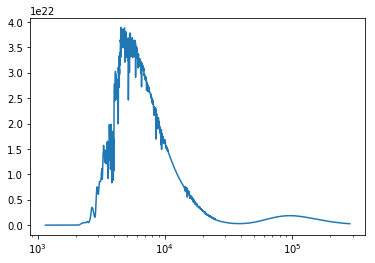

In [21]:
def spectra(wv_data,flux_data,wv_model):
  f = interp1d(wv_data,flux_data)
  return f(wv_model)

##############################################
#All these synthetic spectra are given in W/A# #Spectra from 1150 A to 285500 A
##############################################

def spectrum_m0v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm0v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.580 #T en K

  Mbol = 7.5 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  cte = lum[-1]*wv[-1]**4/T
  wv_a = np.arange(25000,285505,5)
  lum_a = cte*T/(np.power(wv_a,3)) * (1/wv_a) #Rayleigh Jeans
  
  wv = np.concatenate([wv,wv_a]) #whole wavelength in A
  lum = np.concatenate([lum,lum_a]) #whole Luminosity in W/A

  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)#*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_m1v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm1v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.566 #T en K

  Mbol = 7.8 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  cte = lum[-1]*wv[-1]**4/T
  wv_a = np.arange(25000,285505,5)
  lum_a = cte*T/(np.power(wv_a,3)) * (1/wv_a) #Rayleigh Jeans
  
  wv = np.concatenate([wv,wv_a]) #whole wavelength in A
  lum = np.concatenate([lum,lum_a]) #whole Luminosity in W/A

  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_m2v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm2v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.550 #T en K

  Mbol = 8.1 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_m3v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm3v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.519 #T en K

  Mbol = 8.7 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_m4v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm4v_new.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.493 #T en K

  Mbol = 9.1 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_m5v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm5v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.493 #T en K

  Mbol = 9.5 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_m6v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukm6v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.431 #T en K

  Mbol = 10 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_rk0v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukrk0v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.719 #T en K

  Mbol = 4.7 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_k0v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukk0v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.715 #T en K

  Mbol = 5.4 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_k2v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukk2v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.689 #T en K

  Mbol = 5.9 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_k3v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukk3v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.653 #T en K

  Mbol = 6.4 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_k4v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukk4v_new.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.368 #T en K

  Mbol = 6.7 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_k5v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukk5v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.622 #T en K

  Mbol = 7.0 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_k7v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukk7v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.602 #T en K

  Mbol = 7.4 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_g0v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukg0v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.764 #T en K

  Mbol = 4.2 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_rg0v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukrg0v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.751 #T en K

  Mbol = 3.8 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_wg0v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukwg0v_new.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.767 #T en K

  Mbol = 4.7 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_g2v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukg2v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.751 #T en K

  Mbol = 4.6 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_g5v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukg5v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.747 #T en K

  Mbol = 4.7 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_wg5v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukwg5v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.760 #T en K

  Mbol = 5.0 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


def spectrum_rg5v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukrg5v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.748 #T en K

  Mbol = 3.9 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  #a = np.where(flux==0.0)
  #b = np.where(a[0] > 4000)
  #c = a[0][b][0]
  c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)

def spectrum_g8v(T_ds,eta): #T_ds, temperature dyson sphere, eta:Lemi/Lhost < 1
  c = 3e8 #m/s  
  k = 1.38066e-23 #J K^-1
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  AU = 1.496e11 #m
  
  file = 'https://raw.githubusercontent.com/suafle/useful_data/master/Stellar_spectra/ukg8v.dat'
  m_data = np.loadtxt(file,skiprows=2)
  wv = m_data[:,0][:-1] #angstrom
  flux = m_data[:,1][:-1] #dimensionless

  T = 10**3.727 #T en K

  Mbol = 5.1 #Bol abs magnitude M star
  Mbol_sun = 4.69 #Bol abs magnitude Sun
  L = 10**(0.4*(Mbol_sun - Mbol)) #Bol Luminosity M star Lsun = 3.846e26 W = 3.846e33 ers/g
  L = L*Lsun #Bol luminosity in W
  R = np.sqrt(L/(4*np.pi*sigma_SB*T**4)) #Radius of M star in m

  wv_model = np.linspace(wv[0],wv[-1],100000) #wavelength
  integral = np.trapz(spectra(wv,flux,wv_model),x=wv_model)
  A = (4*np.pi*R*R*sigma_SB*T**4)/(integral) #W
  lum = A*flux #W/A Specific Luminosity in W/A
  
  #Add Rayleigh-Jeans
  #To check the end of the spectrum
  a = np.where(flux==0.0)
  b = np.where(a[0] > 4000)
  c = a[0][b][0]
  #c = 0
  cte = lum[c-1]*wv[c-1]**4/T
  wv_a = np.arange(wv[c-1],285505,5)
  lum_a = cte*T/wv_a**4 #Rayleigh Jeans m s**-1 J K**-1 K A**-4 = W m A**-4

  wv = np.concatenate([wv[:c-1],wv_a])
  lum = np.concatenate([lum[:c-1],lum_a]) #Luminosity in W/A
  
  lbol = np.sum(lum)*5 #W Bol lum from spectrum
  lbol_ds = lbol*eta #W Dyson Sphere Bolometric luminosity
  R_ds = np.sqrt(lbol_ds/(4*np.pi*sigma_SB*T_ds**4)) #W/(W m**-2 K**-4 K**4) = m**2

  if R_ds < R:
    print('CHANGE T or ETA: chosen values create unphysical structures')
    print('Star Radius : ', R/Rsun,' Rsun')
    print('DS Radius : ', R_ds/Rsun,' Rsun')
  
  bb = BB(wv,T_ds)*4*np.pi*(R_ds)**2 #BB luminosity in W/A
  return(lum+bb)


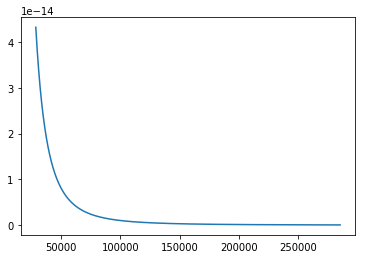

In [13]:
#Very weird finding
x=np.arange(28500,285500,5)
plt.plot(x,(1/x**3))
plt.show()
plt.close()

In [0]:
#def everything()
  #Spectra from stars
  